<a href="https://colab.research.google.com/github/hmaldonado12/7506R-1C2024-GRUPO6/blob/main/Copia_de_7506R_TP1_GRUPO06_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

#### **PREPRACION DE LOS DATOS**
Crear un nuevo dataset que contemplen los siguientes atributos :
- Tipos de vivienda : Casa, Ph Y Departamentos
- Moneda de transacción : Dolares (USD)
- Ubicacion : Capital Federal

##### **1.1 Mostrar informacion del dataset con los filtros requeridos del enunciado**

In [69]:
import pandas as pd
properties_argentina = pd.read_csv('../tp1/properati_argentina_2021.csv')

attributes_list = ["property_type", "operation", "property_currency", "place_l2"]
conditions_list = [["Casa", "PH","Departamento"],["Venta"],["USD"],["Capital Federal"]]

def get_dataframe_by(data, attributes: list, conditions: list):
    is_casa = data[attributes[0]] == conditions[0][0]
    is_ph = data[attributes[0]] == conditions[0][1]
    is_departamento = data[attributes[0]] == conditions[0][2]
    is_operation_venta = data[attributes[1]] == conditions[1][0]
    is_property_currency_usd = data[attributes[2]] == conditions[2][0]
    is_place_l2_capital_federal = data[attributes[3]] == conditions[3][0]
    return data[(is_casa | is_ph | is_departamento) & is_operation_venta & is_property_currency_usd & is_place_l2_capital_federal]

properties_argentina_filtered = get_dataframe_by(properties_argentina, attributes_list, conditions_list)
properties_argentina_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94249 entries, 25 to 460090
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94249 non-null  object 
 1   start_date                94249 non-null  object 
 2   end_date                  94249 non-null  object 
 3   created_on                94249 non-null  object 
 4   latitud                   90519 non-null  float64
 5   longitud                  90519 non-null  float64
 6   place_l2                  94249 non-null  object 
 7   place_l3                  93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 94249 non-null  object 
 12  property_type             94249 non-null  object 
 13  property_rooms            93205 non-null  float64
 14  property_

## **ENTENDER EL PROBLEMA**
El objetivo del tp es poder entrenar un modelo que pueda predecir el valor de venta de un inmueble en cualquier barrio de capital federal.

Antes de empezar a crear y entrenar nuestro modelo, es importante realizar las siguientes preguntas :
-  ¿ Que tipo de supervision necesitara nuestro modelo ?
    
    Tarea de aprendizaje de supervision, ya que los datos cuentan con ejemplos etiquetados( Cada instancia viene con una salida esperada, el precio del inmueble)
- ¿Que tipo de aprendizaje ?
    
    En este caso el tipo de aprendizaje es por lotes, ya que no contamos con datos que evolucionen de forma constante
- ¿ Que modelo podemos utilizar ?
    
    Puede ser un modelo de regresion ya que se pide predecir un valor.

### COMPROBACIONES PLANTEADAS EN EL TP
Las comprobaciones nos daran un entendimiento mas profundo sobre los datos. Con lo conocimientos de los datos vamos a tener mas criterio para poder limpiar los mismo y poder entrenar el modelo.
#### a) Exploración Inicial : analizar cada variable, considerando los siguientes aspectos
#### a.1)Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda,etc

In [70]:
properties_argentina_filtered.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,90519.000000,90519.000000,0.0,93205.000000,83262.000000,89405.000000,90895.000000,9.424900e+04
mean,-34.591481,-58.449795,NaN,2.822799,2.014629,109.092970,87.931932,2.262382e+05
std,0.181719,0.292630,NaN,1.426148,1.129767,980.401976,990.927129,3.186035e+05
min,-53.788624,-71.471192,NaN,1.000000,-1.000000,10.000000,1.000000,5.000000e+03
25%,-34.615975,-58.466522,NaN,2.000000,1.000000,45.000000,40.000000,9.500000e+04
50%,-34.595790,-58.439000,NaN,3.000000,2.000000,65.000000,58.000000,1.439000e+05
75%,-34.577413,-58.408862,NaN,4.000000,3.000000,105.000000,88.000000,2.370000e+05
max,-24.219827,-54.133330,NaN,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07


#### a.2) Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [71]:
properties_argentina_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94249 entries, 25 to 460090
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94249 non-null  object 
 1   start_date                94249 non-null  object 
 2   end_date                  94249 non-null  object 
 3   created_on                94249 non-null  object 
 4   latitud                   90519 non-null  float64
 5   longitud                  90519 non-null  float64
 6   place_l2                  94249 non-null  object 
 7   place_l3                  93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 94249 non-null  object 
 12  property_type             94249 non-null  object 
 13  property_rooms            93205 non-null  float64
 14  property_

#### a.3) Determinar variables irrelevantes en el análisis
Con la informacion del punto anterior podemos determinar algunas variables que no son relevantes para nuestro modelo, es decir no nos van aportar informacion de calidad que sirva para el entranamiento del modelo.

##### **Analisis :**
c.1) Los atributos start_date, end_date y create_on  hacen referencia a las fechas en las cuales se crearon los datos, por lo tanto esto no es relevante para nuestro modelo de prediccion

c.2) Los atributos place_l3 y place_l4, no conocemos a fondo que tipo de informacion nos pueden aportar para determinar el precio de  una propiedad. Vamos a mostrar en detalle que tio de informacion tienen ambos atributos en forma de tabla.

Loas atributos place_l2 , place_l5 y place_l6 los dejamos afurea del analisis. El atributo place_l2 lo utilizamos para filtrar la informacion por capital federal y los atributos place_l6,place_5 directamente no tiene datos.


#### **PLACE_L3**

In [72]:
counts_place_l3 = properties_argentina_filtered["place_l3"]
print(counts_place_l3.value_counts())

place_l3
Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
V

#### **PLACE_L4**

In [73]:
counts_place_l4 = properties_argentina_filtered["place_l4"]
print(counts_place_l4.value_counts())

place_l4
Palermo Hollywood    1576
Palermo Chico        1092
Palermo Soho          804
Palermo Viejo         171
Name: count, dtype: int64


Podemos concluir que son atributos relevantes ya que el barrio puede influir en el precion de un inmueble.
Los valore irrelevantes para nuestro analisis son :
- start_date
- end_date
- create_on
- place_l5
- place_l6

Por lo tanto estas variables se pueden eliminar del data frame

In [74]:
properties_argentina_filtered.drop(columns=["start_date", "end_date", "created_on", "place_l5", "place_l6"]).head()

,id,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,NaN,NaN,Capital Federal,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,-34.637319,-58.361124,Capital Federal,Boca,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,-34.628647,-58.361871,Capital Federal,Boca,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,-34.610027,-58.401934,Capital Federal,Once,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,-34.631621,-58.416825,Capital Federal,Boedo,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


#### a.4)  Realizar un análisis gráfico de las distribuciones de las variables más relevantes

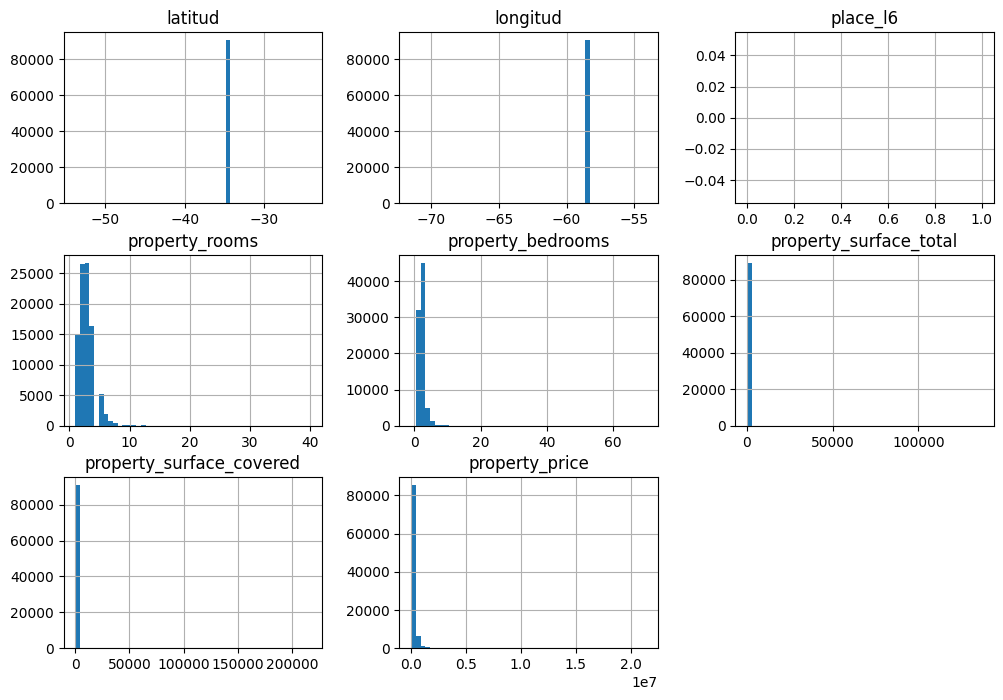

In [75]:
import matplotlib.pyplot as plt
properties_argentina_filtered.hist(figsize=(12, 8), bins=50)
plt.show()

#### a.5) Analizar las correlaciones existentes entre las variables.
Para analizar la correlacion entre las variables, hay que seleccionar aquellas variables del tipo float64

In [76]:
properties_argentina_numeric = properties_argentina_filtered.select_dtypes(include=['float64', 'int64'])
corr_matrix = properties_argentina_numeric.corr()
corr_property_price = corr_matrix["property_price"].sort_values(ascending=False)
print(corr_property_price)

property_price              1.000000
property_rooms              0.488934
property_bedrooms           0.425386
property_surface_total      0.085235
property_surface_covered    0.056238
longitud                    0.023314
latitud                     0.016635
place_l6                         NaN
Name: property_price, dtype: float64


Se analiza la correlacion de todos los atributos respecto al precio de la propiedad,podemos observar que los  atributo rooms y bedrooms tiene correlaciones positivas, esto quiere decir que el precio de una vivienda puede aumentar si estos dos atributos aumentan.
Con esta informacion tambien nos podemos preguntar lo siguiente : ¿ La proporcion de habitaciones/ambientes por casa puede influir el en precio de una propiedad ?, para contestar esta pregunta, se puede crear una nueva variable que represente el nuevo atributo


In [77]:
properties_argentina_filtered_copy = properties_argentina_filtered.copy()
properties_argentina_filtered_copy["property_bedrooms_ratio"] = properties_argentina_filtered_copy["property_bedrooms"] / properties_argentina_filtered_copy["property_rooms"]

properties_argentina_numeric = properties_argentina_filtered_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = properties_argentina_numeric.corr()
corr_property_price = corr_matrix["property_price"].sort_values(ascending=False)
print(corr_property_price)


property_price              1.000000
property_rooms              0.488934
property_bedrooms           0.425386
property_surface_total      0.085235
property_bedrooms_ratio     0.061967
property_surface_covered    0.056238
longitud                    0.023314
latitud                     0.016635
place_l6                         NaN
Name: property_price, dtype: float64


Si observamos el valor obtenido no tiene mucha influencia en sobre el valor de un propiedad.
Tambien se puede hacer el mismo analisis con la proporcion de la property_surface_covered/property_surface_total

In [78]:
properties_argentina_filtered_copy = properties_argentina_filtered.copy()
properties_argentina_filtered_copy["property_surface_ratio"] = properties_argentina_filtered_copy["property_surface_covered"] / properties_argentina_filtered_copy["property_surface_total"]

properties_argentina_numeric = properties_argentina_filtered_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = properties_argentina_numeric.corr()
corr_property_price = corr_matrix["property_price"].sort_values(ascending=False)
print(corr_property_price)

property_price              1.000000
property_rooms              0.488934
property_bedrooms           0.425386
property_surface_total      0.085235
property_surface_covered    0.056238
longitud                    0.023314
latitud                     0.016635
property_surface_ratio     -0.001382
place_l6                         NaN
Name: property_price, dtype: float64


Si bien es una correlacion negativa, el valor no es muy representativo, por lo tanto podemos concluir que no influye en la determinacion del precio de una propiedad.
Concluimos que las dos atributos que pueden influir en el precio de una propiedad son : property_bedrooms y property_rooms.

### b) Visualización de los datos: en esta sección se espera que puedan realizar una primera
aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de dispersión
entre variables, histogramas, heatmaps, exploración de las columnas y cualquier otro gráfico
adicional que se considere útil justificando su utilización.
Para visualizar los datos, vamos a utilizar un grafico del tipo geografico. Est nos ayudara a entender en que zonas de capital los precios de las propiedades pueden ser mas caras o mas baratas.

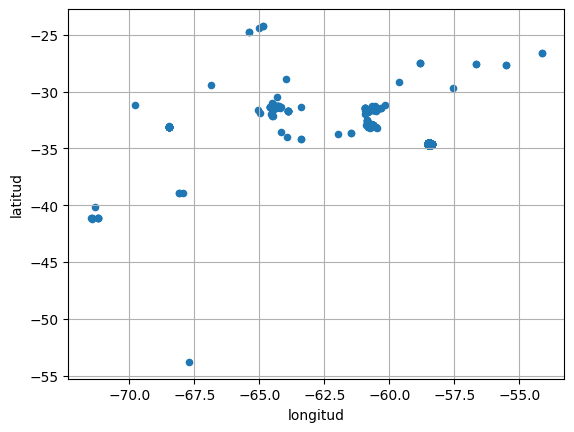

In [81]:
properties_argentina_filtered.plot(kind="scatter", x="longitud", y="latitud", grid=True)
plt.show()

Otra cosa que podemos hacer es ver la densidad de puntos en el mapa

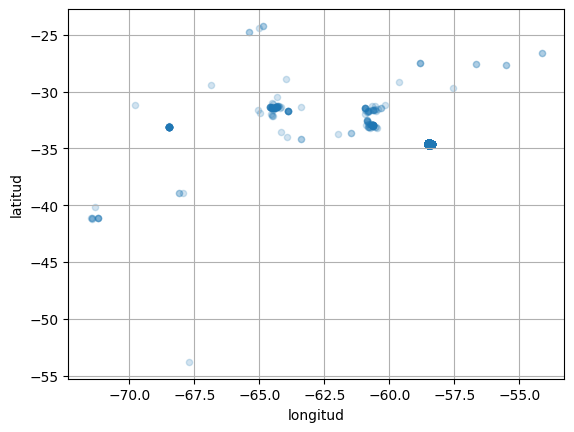

In [83]:
properties_argentina_filtered.plot(kind="scatter", x="longitud", y="latitud", grid=True, alpha=0.2)
plt.show()